# Music Recommendation Project:

### By Anuroop Arya

## Problem Statement:

Music recommender systems can suggest songs to users based on their listening patterns.
Datasetlinks :https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset

train = pd.read_csv('train.csv')
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [3]:
# Explore the data

train.head()
songs.head()
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [4]:
train.info()
songs.info()
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62461 entries, 0 to 62460
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                62461 non-null  object 
 1   song_id             62461 non-null  object 
 2   source_system_tab   62269 non-null  object 
 3   source_screen_name  60173 non-null  object 
 4   source_type         62340 non-null  object 
 5   target              62460 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84497 entries, 0 to 84496
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   song_id      84497 non-null  object 
 1   song_length  84497 non-null  int64  
 2   genre_ids    82903 non-null  object 
 3   artist_name  84497 non-null  object 
 4   composer     49031 non-null  object 
 5   lyricist     23032 non-null  object 
 6  

In [5]:
train.describe()
songs.describe()
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [6]:
train.shape
songs.shape
members.shape

(34403, 7)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

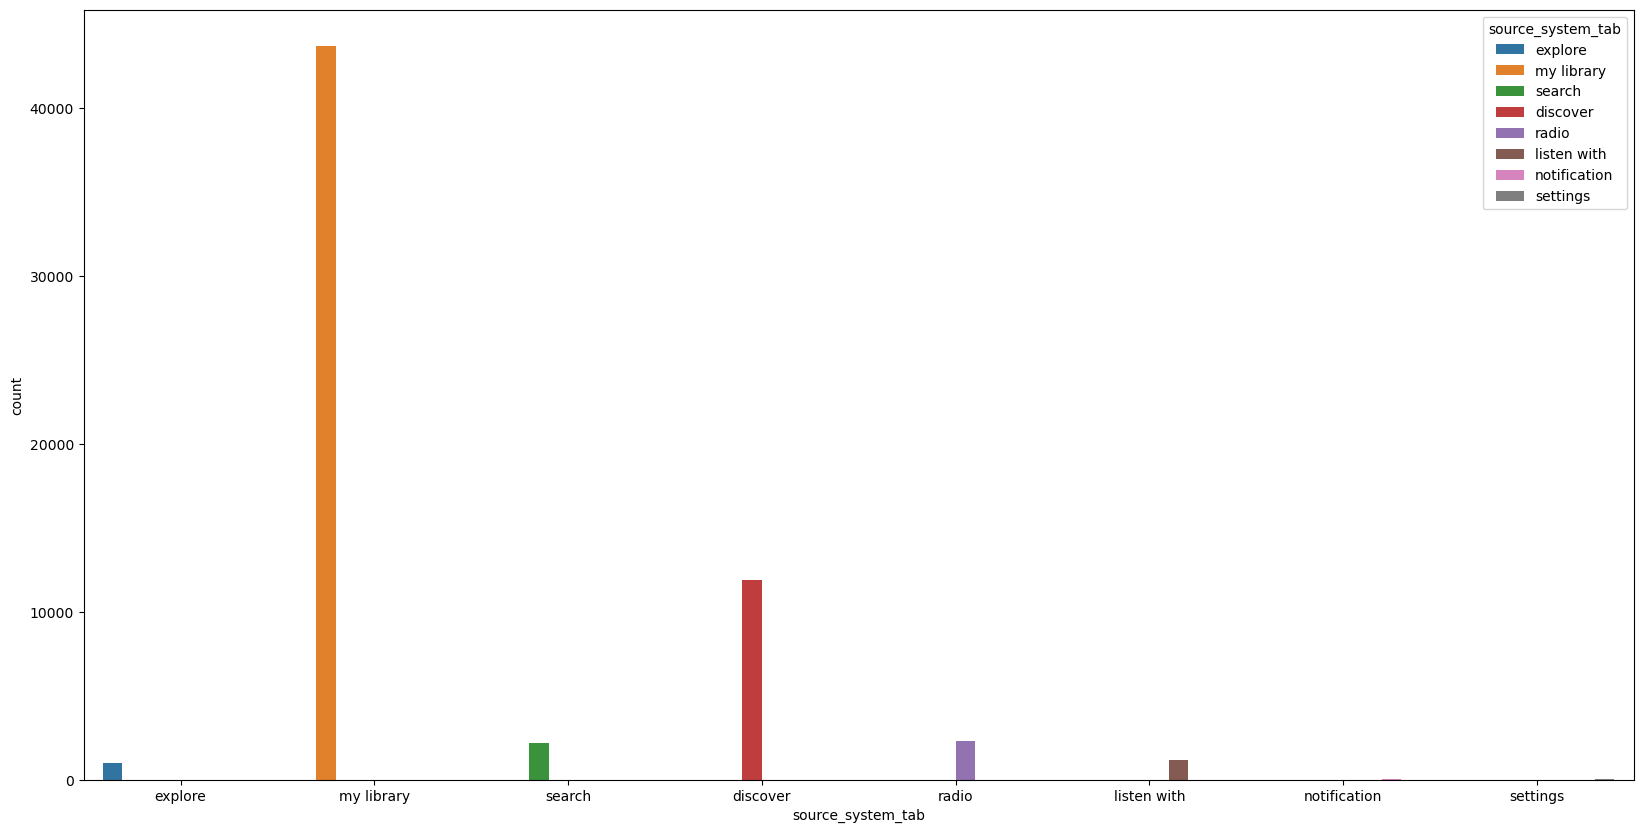

In [7]:
# Plotting the graphs

plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

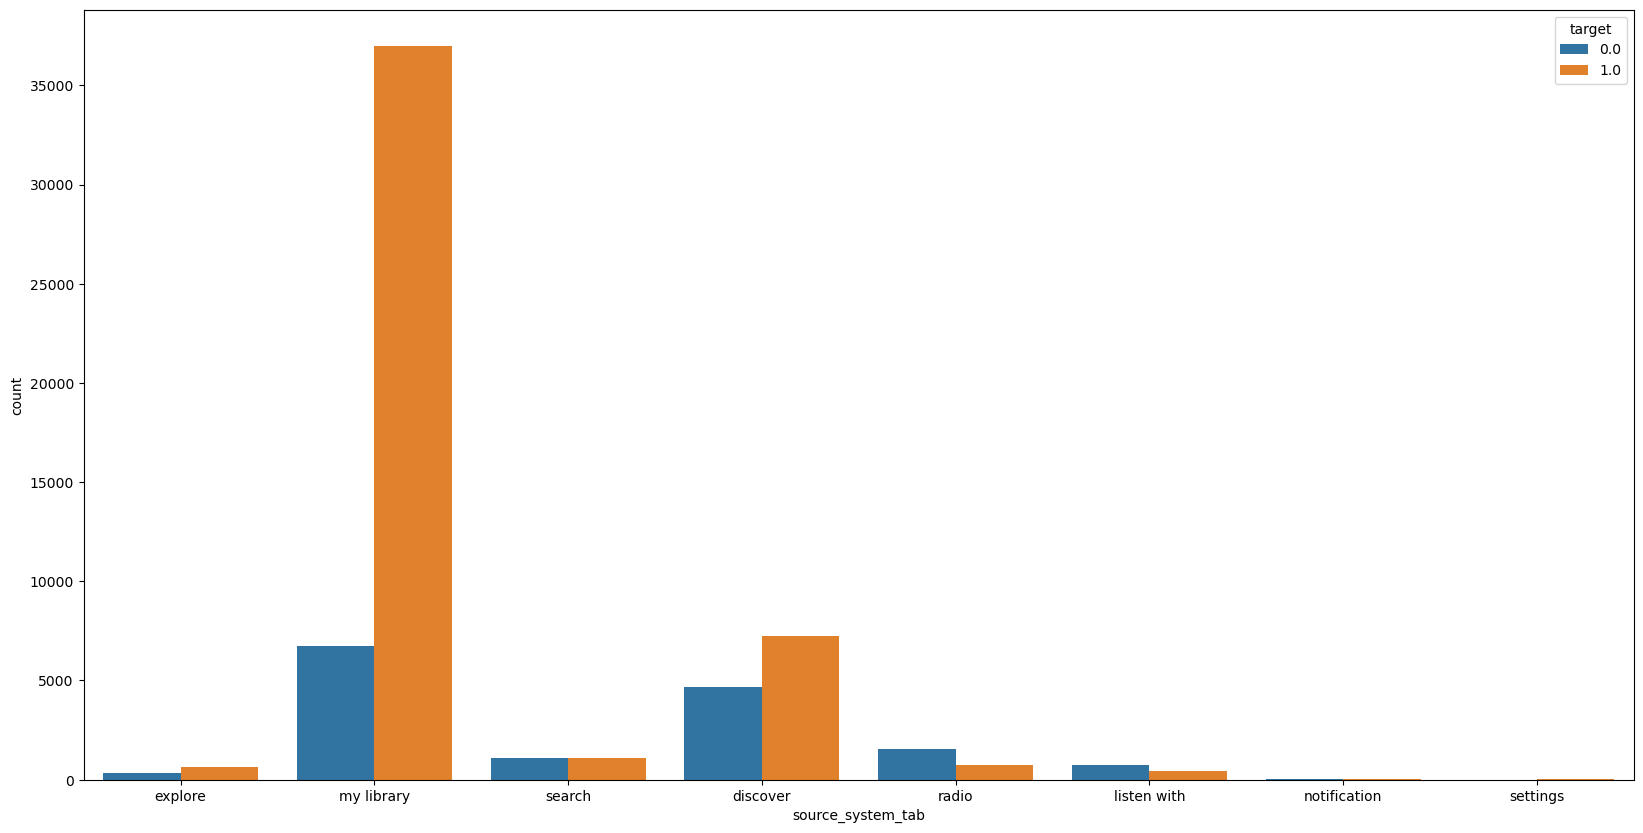

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

<AxesSubplot:xlabel='source_screen_name', ylabel='count'>

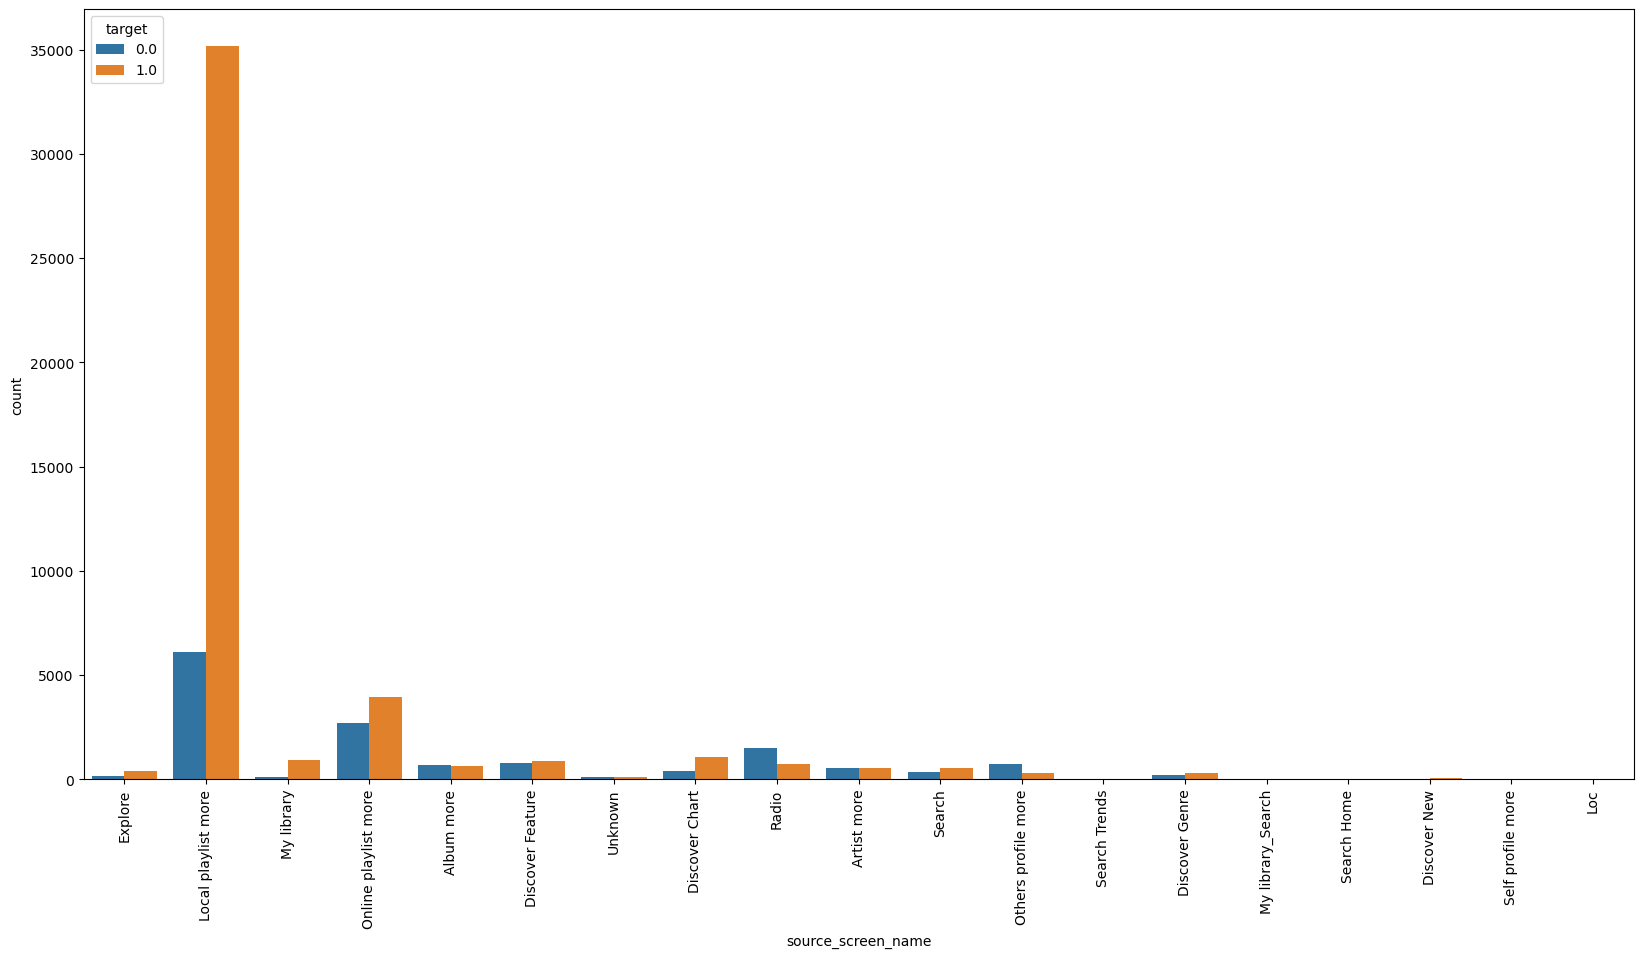

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target', data=train)

<AxesSubplot:xlabel='source_type', ylabel='count'>

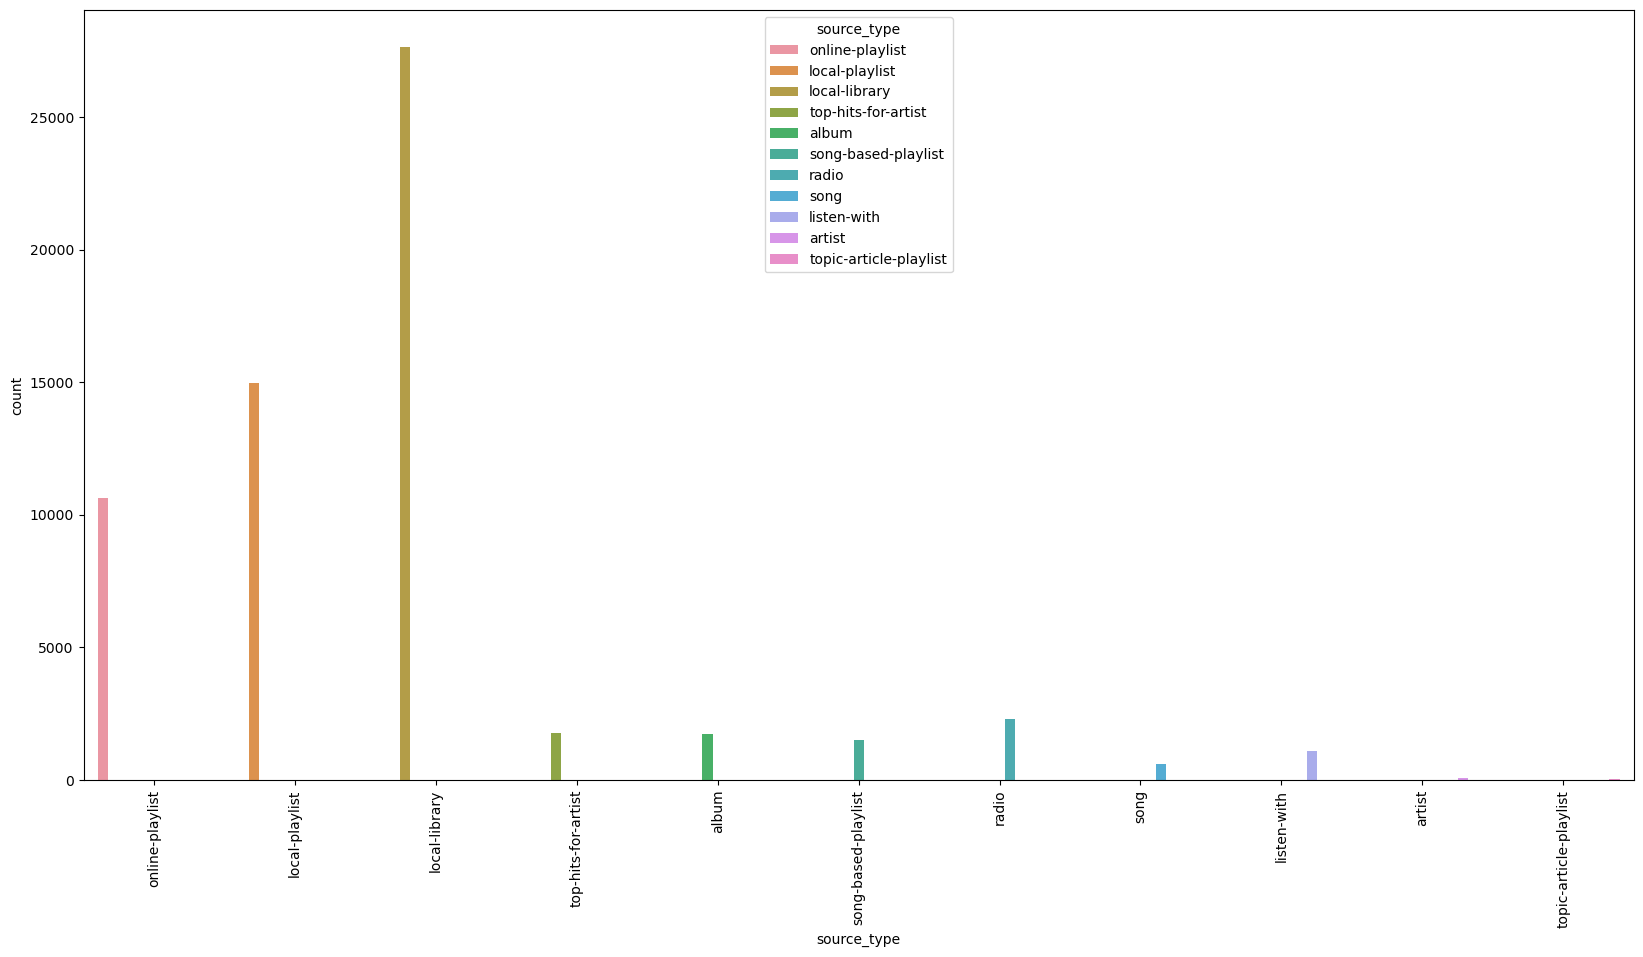

In [10]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type', data=train)


<AxesSubplot:xlabel='source_type', ylabel='count'>

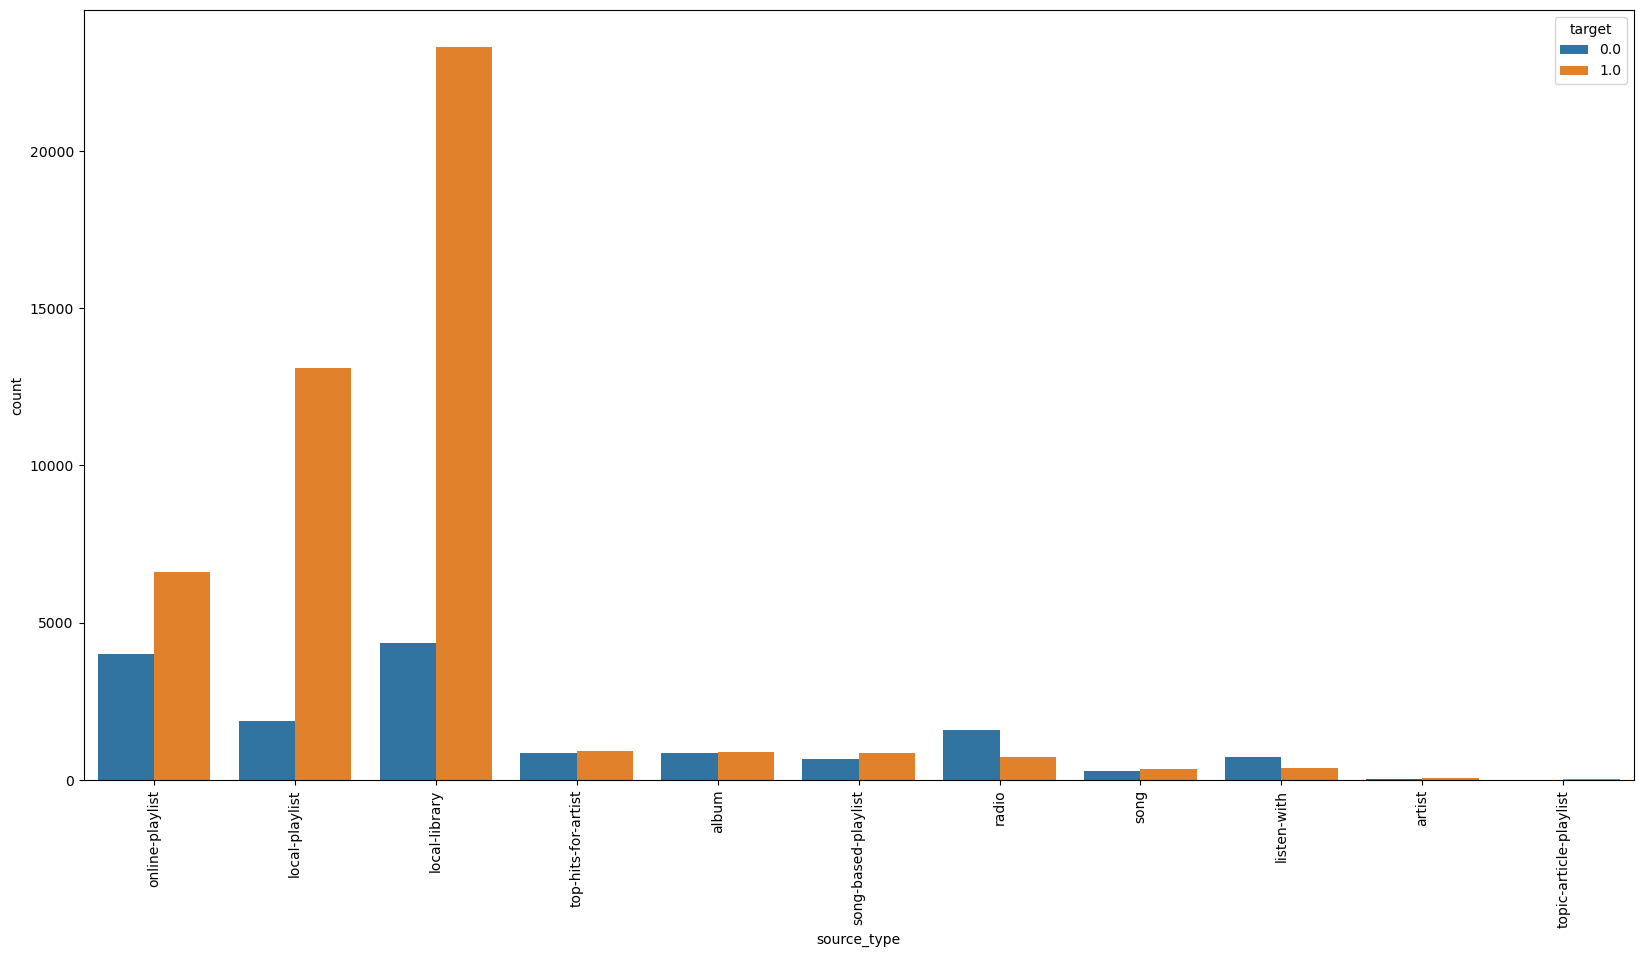

In [11]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target', data=train)

<AxesSubplot:xlabel='language', ylabel='count'>

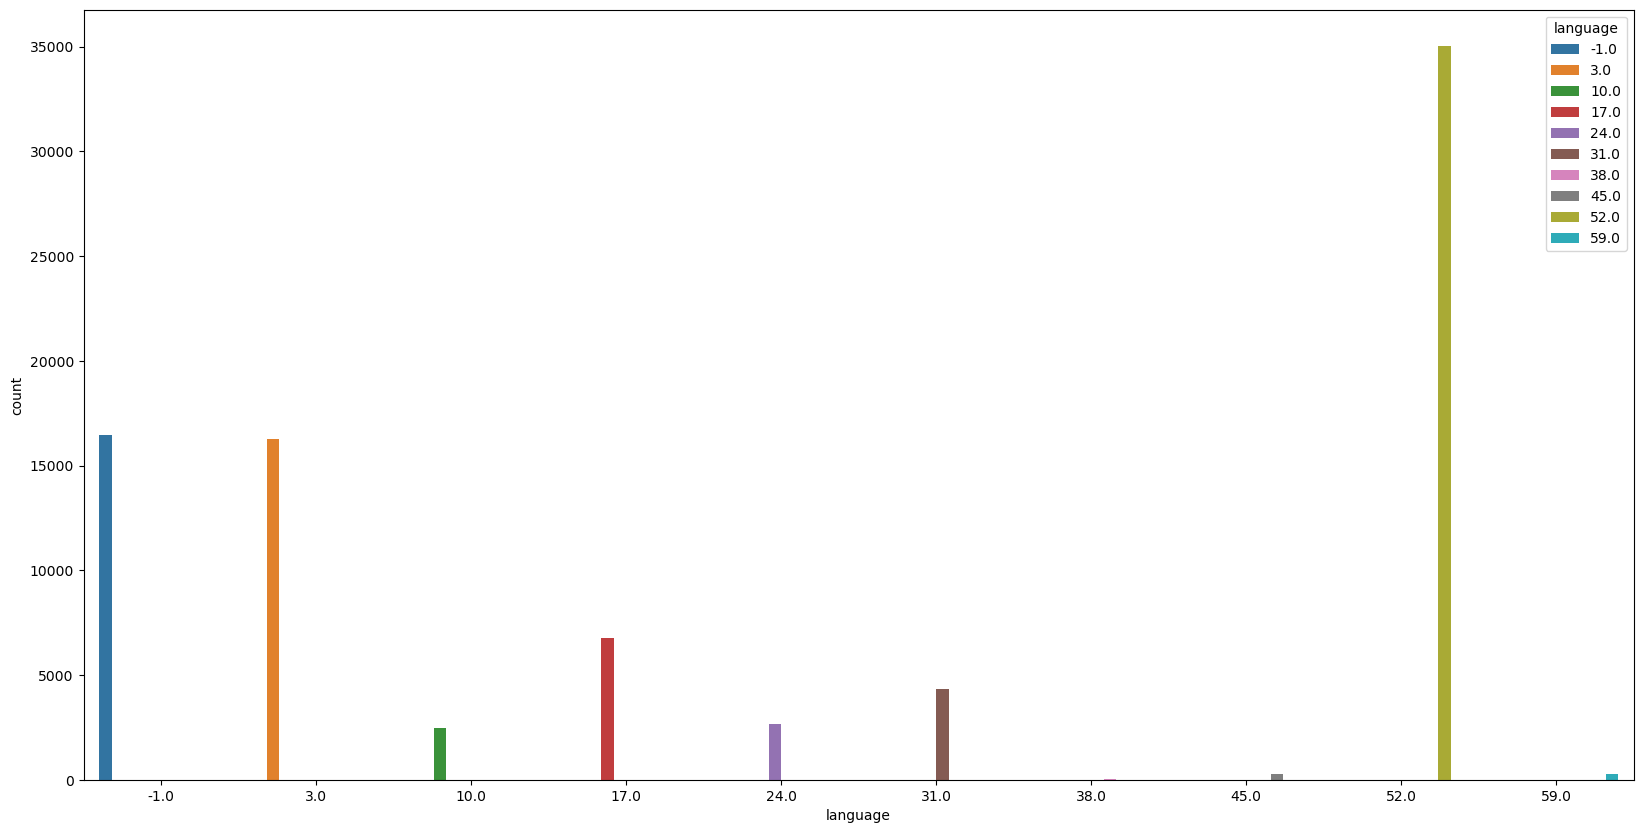

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='language', hue='language', data=songs)


<AxesSubplot:xlabel='registered_via', ylabel='count'>

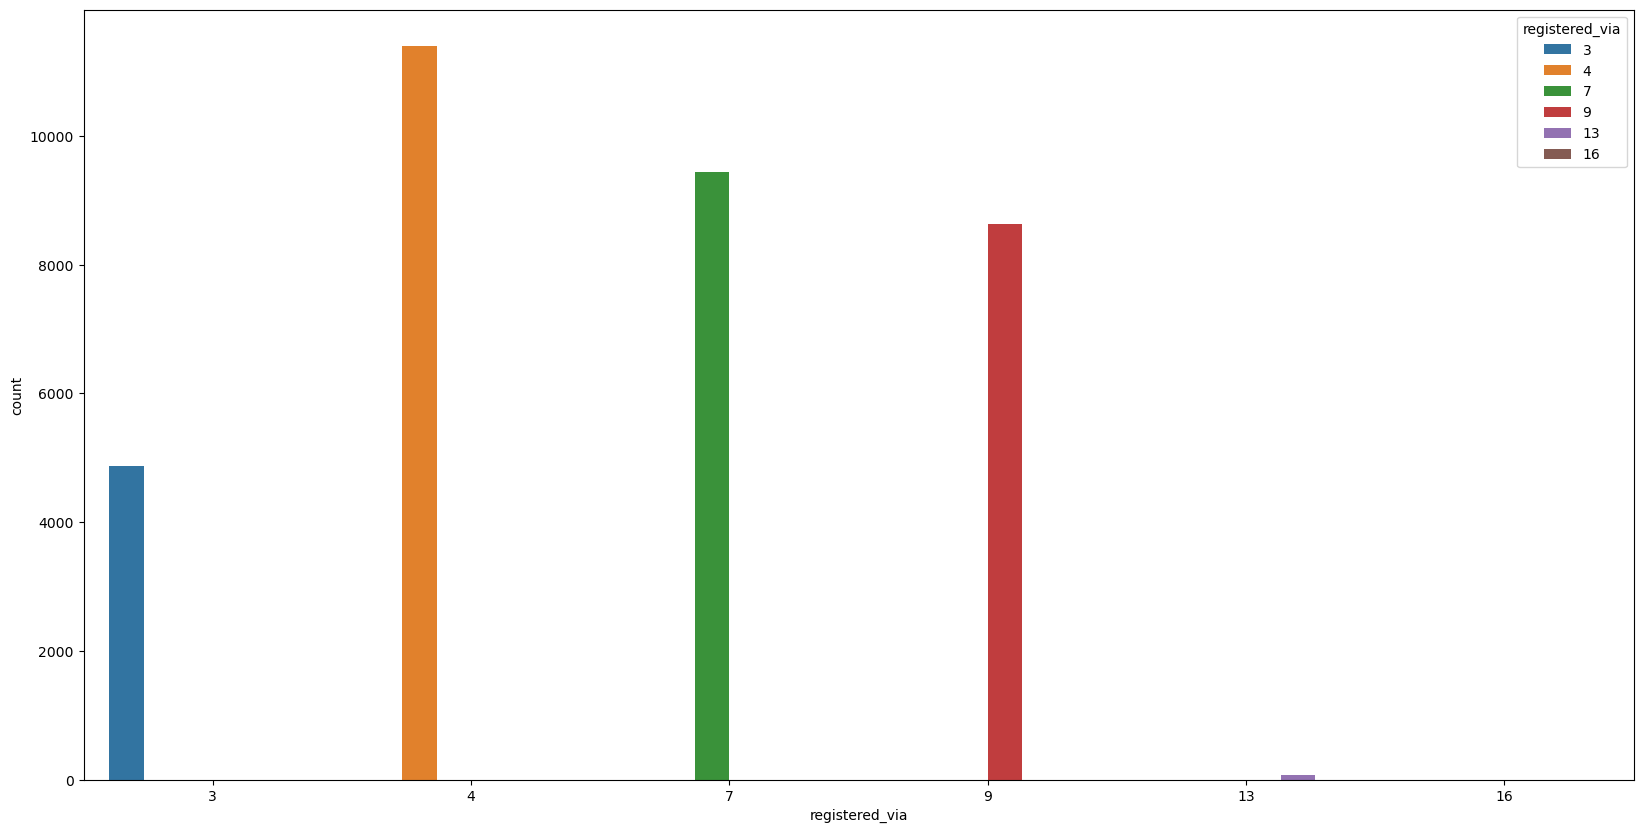

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via', hue='registered_via', data=members)

In [14]:
# Prepare the test dataset

ntr = 7000
nts = 3000
names = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target']
test1 = pd.read_csv('train.csv', names=names, skiprows=ntr, nrows=nts)

In [15]:
test = test1.drop(['target'], axis=1)
ytr = np.array(test1['target'])

In [16]:
test_name = ['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type']
test['id'] = np.arange(nts)
test = test[test_name]


In [17]:
# Merge songs data with train and test datasets

song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [18]:

# Process members data
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))



In [19]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [20]:
# Merge members data with train and test datasets

members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [21]:
# Fill missing values with -1

train = train.fillna(-1)
test = test.fillna(-1)

In [22]:
import gc
del members, songs
gc.collect()

0

In [23]:
# Encoding categorical variables

cols = list(train.columns)
cols.remove('target')

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 62.27it/s]


In [24]:
# Building the model

from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test
gc.collect()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=12)

del X, y
gc.collect()

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]


In [25]:
# Define function to train and predict using the model

def predict(model):
    model = model.fit(X_train, y_train)
    print('Training Score : {}'.format(model.score(X_train, y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test > 0.5).astype(int)
    comp = (yhat == ytr).astype(int)
    acc = comp.sum() / comp.size * 100
    print("Accuracy on test data for the model: {}".format(acc))


In [26]:
# Prediction using LightGBM

params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=1)

p_test = model1.predict(X_test)




[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.815498	valid_1's auc: 0.786918
Training until validation scores don't improve for 10 rounds
[2]	training's auc: 0.852327	valid_1's auc: 0.822649
[3]	training's auc: 0.871904	valid_1's auc: 0.836688
[4]	training's auc: 0.885157	valid_1's auc: 0.851401
[5]	training's auc: 0.896574	valid_1's auc: 0.862389
[6]	training's auc: 0.902786	valid_1's auc: 0.862641
[7]	training's auc: 0.90792	valid_1's auc: 0.865927
[8]	training's auc: 0.913712	valid_1's auc: 0.868051
[9]	training's auc: 0.918489	valid_1's auc: 0.870991
[10]	training's auc: 0.923583	valid_1's auc: 0.870658
[11]	training's auc: 0.928303	valid_1's auc: 0.871153
[12]	training's auc: 0.932188	valid_1's auc: 0.874251
[13]	training's auc: 0.935289	valid_1's auc: 0.87364
[14]	training's auc

In [27]:
yhat = (p_test > 0.5).astype(int)
comp = (yhat == ytr).astype(int)
acc = comp.sum() / comp.size * 100
print('The accuracy of the LightGBM model on test data is: {:.2f}%'.format(acc))

The accuracy of the LightGBM model on test data is: 89.33%
